In [1]:
#!pip install resampy

In [2]:
import pandas as pd
import numpy as np
import librosa
import glob
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing.image import load_img,array_to_img

In [3]:
set_a=pd.read_csv(r'../Dataset/Heart_beat_Sounds/set_a.csv')
set_a.head()

dataset                             fname     label  sublabel
0       a  set_a/artifact__201012172012.wav  artifact       NaN
1       a  set_a/artifact__201105040918.wav  artifact       NaN
2       a  set_a/artifact__201105041959.wav  artifact       NaN
3       a  set_a/artifact__201105051017.wav  artifact       NaN
4       a  set_a/artifact__201105060108.wav  artifact       NaN

In [4]:
set_b=pd.read_csv(r'../Dataset/Heart_beat_Sounds/set_b.csv')
set_b.head()

dataset                                              fname       label  \
0       b  set_b/Btraining_extrastole_127_1306764300147_C...  extrastole   
1       b  set_b/Btraining_extrastole_128_1306344005749_A...  extrastole   
2       b  set_b/Btraining_extrastole_130_1306347376079_D...  extrastole   
3       b  set_b/Btraining_extrastole_134_1306428161797_C...  extrastole   
4       b  set_b/Btraining_extrastole_138_1306762146980_B...  extrastole   

  sublabel  
0      NaN  
1      NaN  
2      NaN  
3      NaN  
4      NaN

In [5]:
frames=[set_a,set_b]
train_ab=pd.concat(frames)
train_ab

dataset                                              fname     label  \
0         a                   set_a/artifact__201012172012.wav  artifact   
1         a                   set_a/artifact__201105040918.wav  artifact   
2         a                   set_a/artifact__201105041959.wav  artifact   
3         a                   set_a/artifact__201105051017.wav  artifact   
4         a                   set_a/artifact__201105060108.wav  artifact   
..      ...                                                ...       ...   
651       b  set_b/Btraining_normal_Btraining_noisynormal_2...    normal   
652       b  set_b/Btraining_normal_Btraining_noisynormal_2...    normal   
653       b  set_b/Btraining_normal_Btraining_noisynormal_2...    normal   
654       b  set_b/Btraining_normal_Btraining_noisynormal_2...    normal   
655       b  set_b/Btraining_normal_Btraining_noisynormal_2...    normal   

        sublabel  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  
..           ...  
651  noisynormal  
652  noisynormal  
653  noisynormal  
654  noisynormal  
655  noisynormal  

[832 rows x 4 columns]

In [6]:
print(len(train_ab))
train_ab.drop_duplicates(inplace=True)
print(len(train_ab))

832
832


In [7]:
train_ab['label'].isnull().sum().sum()

247

In [8]:
train_ab.groupby(['label']).count()['dataset'].reset_index()

label  dataset
0    artifact       40
1    extrahls       19
2  extrastole       46
3      murmur      129
4      normal      351

In [9]:
train_ab.groupby(['label']).count()['dataset'].reset_index()['dataset'].sum()

585

In [10]:
#Adding null+other values=Total dataset count
585+247

832

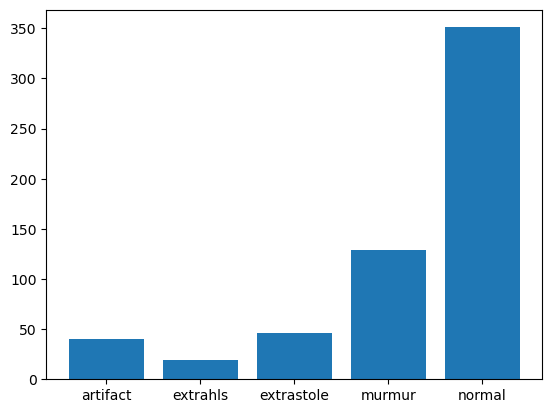

In [11]:
#Visualize the data distribution over differnt data labels
plt.bar(x=train_ab.groupby(['label']).count().reset_index()['label'],height=train_ab.groupby(['label']).count().reset_index()['dataset'])
plt.show()

In [12]:
no_of_classes=train_ab['label'].nunique()
no_of_classes

5

In [13]:
train_ab.count()

dataset     832
fname       832
label       585
sublabel    149
dtype: int64

In [14]:
#Analyse normal audio

In [15]:
import IPython.display as ipd

In [16]:
ipd.Audio(r'../Dataset/Heart_beat_Sounds/set_a/normal__201106111136.wav')

In [17]:
import wave

In [18]:
wav=wave.open(r'../Dataset/Heart_beat_Sounds/set_a/normal__201106111136.wav')
framerate=wav.getframerate()
no_of_frames=wav.getnframes()

In [19]:
duration=framerate/no_of_frames
duration

0.20145909375385446

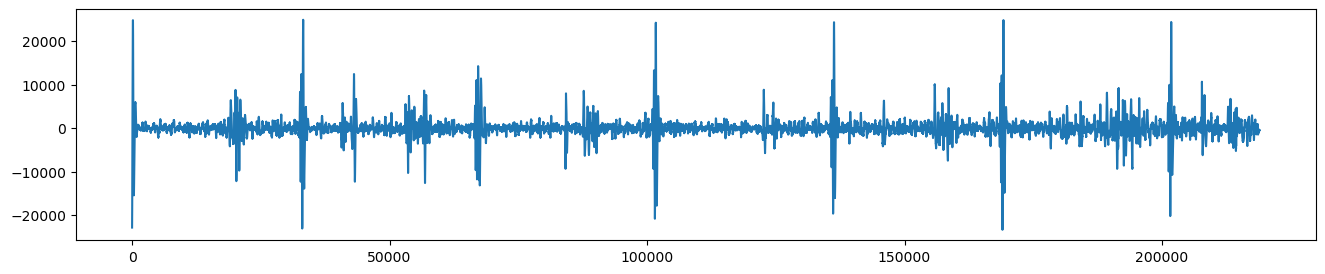

In [20]:
#To visualize the normal sound
from scipy.io import wavfile
rate,data=wavfile.read(r'../Dataset/Heart_beat_Sounds/set_a/normal__201106111136.wav')
plt.figure(figsize=(16, 3))
plt.plot(data,'-',)
plt.show()

In [21]:
#analysing Murmur
ipd.Audio(r'../Dataset/Heart_beat_Sounds/set_a/murmur__201101051108.wav')

In [22]:
murmur_wav=wave.open(r'../Dataset/Heart_beat_Sounds/set_a/murmur__201101051108.wav')

In [23]:
get_frame=murmur_wav.getframerate()
no_of_frames=murmur_wav.getnframes()
duration=get_frame/no_of_frames
duration

0.11256116205999689

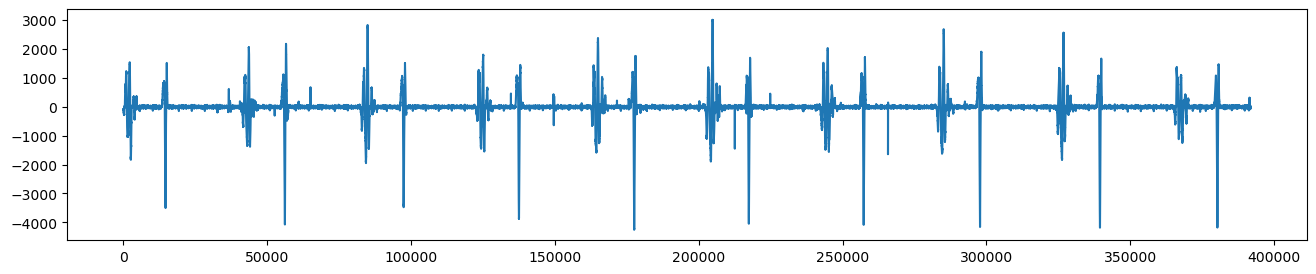

In [24]:
#Visualize murmur
mur_rate,mur_data=wavfile.read(r'../Dataset/Heart_beat_Sounds/set_a/murmur__201101051108.wav')
plt.figure(figsize=(16,3))
plt.plot(mur_data,'-',)
plt.show()

In [25]:
#Analysing Extrasystole
ipd.Audio(r'../Dataset/Heart_beat_Sounds/set_a/extrahls__201101070953.wav')

In [26]:
extra=wave.open(r'../Dataset/Heart_beat_Sounds/set_a/extrahls__201101070953.wav')

In [27]:
frame_rate=extra.getframerate()
no_of_frames=extra.getnframes()
duration=frame_rate/no_of_frames
duration

0.11256116205999689

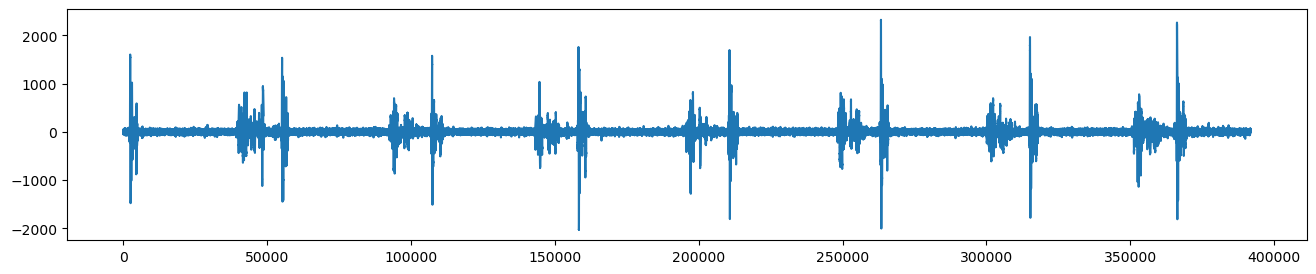

In [28]:
#Visualise 
rate,data=wavfile.read(r'../Dataset/Heart_beat_Sounds/set_a/extrahls__201101070953.wav')
plt.figure(figsize=(16,3))
plt.plot(data,'-')
plt.show()

In [29]:
#Analysing Artifact
ipd.Audio(r'../Dataset/Heart_beat_Sounds/set_a/artifact__201012172012.wav')

In [30]:
arti=wave.open(r'../Dataset/Heart_beat_Sounds/set_a/artifact__201012172012.wav')

In [31]:
frame_rate=arti.getframerate()
no_of_frames=arti.getnframes()
duration=frame_rate/no_of_frames
duration

0.1111111111111111

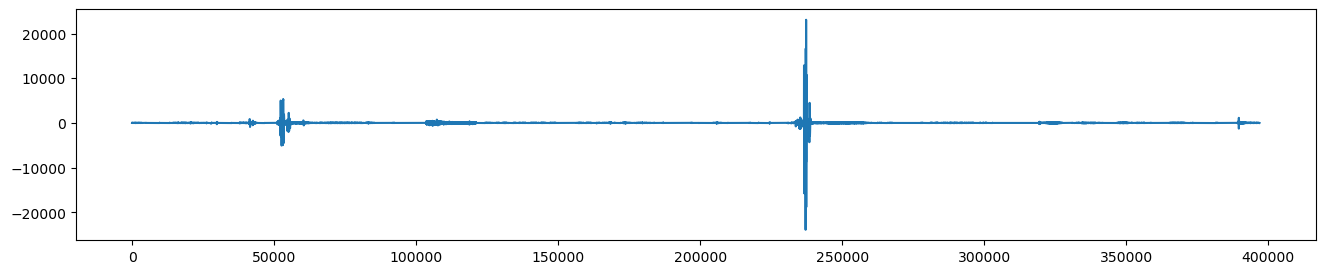

In [32]:
ret,data=wavfile.read(r'../Dataset/Heart_beat_Sounds/set_a/artifact__201012172012.wav')
plt.figure(figsize=(16,3))
plt.plot(data,'-')
plt.show()

In [33]:
#MFCC for normal

In [34]:
import os
normal_path=r'../Dataset/Heart_beat_Sounds/set_a/normal__201101070538.wav'
y,sr=librosa.load(normal_path)
mfccs=librosa.feature.mfcc(y=y,sr=sr)
mfccs

C:\Users\buvan\anaconda3\Lib\site-packages\paramiko\pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "cipher": algorithms.TripleDES,
C:\Users\buvan\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.Blowfish and will be removed from this module in 45.0.0.
  "class": algorithms.Blowfish,
C:\Users\buvan\anaconda3\Lib\site-packages\paramiko\transport.py:243: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "class": algorithms.TripleDES,


array([[-5.4861127e+02, -4.9945056e+02, -4.8593689e+02, ...,
        -4.9063943e+02, -4.1666901e+02, -4.0478873e+02],
       [ 5.2713581e+01,  6.9522240e+01,  8.0006958e+01, ...,
         7.1988937e+01,  1.1035843e+02,  1.1901956e+02],
       [-1.0773587e-01,  1.0074327e+01,  1.6880552e+01, ...,
         7.2428427e+00,  2.1306427e+01,  2.7857550e+01],
       ...,
       [-4.4547362e+00, -8.6582289e+00, -9.1594467e+00, ...,
         6.6830426e-01,  1.7205958e+00,  2.3032553e+00],
       [-1.1501144e+01, -9.7079506e+00, -8.7135935e+00, ...,
        -3.4009233e+00, -7.3898773e+00, -7.7392006e+00],
       [-2.2588387e+00, -5.7121534e+00, -6.8731565e+00, ...,
         3.8332958e+00,  3.2428136e+00,  2.2724414e+00]], dtype=float32)

In [35]:
import os
import fnmatch
import librosa
import numpy as np

# 16 KHz
SAMPLE_RATE = 16000
# seconds
MAX_SOUND_CLIP_DURATION=12

A_Folder=r'../Dataset/Heart_beat_Sounds/set_a/'
print("Processing folder:", A_Folder)

# Loading Audio files with a fix padding may also chop off some file
def load_file_data(folder, file_names, duration=12, sr=16000):
    input_length = sr * duration
    data = []
    for file_name in file_names:
        sound_file = os.path.join(folder, file_name)
        print("Load file:", sound_file)
        try:
            X, sr = librosa.load(sound_file, sr=sr, duration=duration, res_type='kaiser_fast')
            print("Loaded audio shape:", X.shape, "Sample rate:", sr)
            dur = librosa.get_duration(y=X, sr=sr)
            print("Duration:", dur)
            if round(dur) < duration:
                print("Fixing audio length:", file_name)
                y = librosa.util.fix_length(data=X, size=input_length)
                mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
            else:
                mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sr, n_mfcc=40).T, axis=0)

            feature = np.array(mfccs).reshape([-1, 1])
            data.append(feature)
        except Exception as e:
            print(f"Error encountered while parsing file: {sound_file} - {e}")
    return np.array(data)

Processing folder: ../Dataset/Heart_beat_Sounds/set_a/


In [36]:
import os
import fnmatch

In [37]:
# 16 KHz
SAMPLE_RATE = 16000
# seconds
MAX_SOUND_CLIP_DURATION=12 

In [38]:
# Loading A folder files
artifact_files = fnmatch.filter(os.listdir(A_Folder), 'artifact*.wav')
print("Artifact files found:", artifact_files)
A_artifact_sounds = load_file_data(folder=A_Folder, duration=MAX_SOUND_CLIP_DURATION, file_names=artifact_files)
A_artifact_labels = [0 for _ in artifact_files]

normal_files = fnmatch.filter(os.listdir(A_Folder), 'normal*.wav')
print("Normal files found:", normal_files)
A_normal_sounds = load_file_data(file_names=normal_files, folder=A_Folder, duration=MAX_SOUND_CLIP_DURATION)
A_normal_labels = [1 for _ in normal_files]

extra_files = fnmatch.filter(os.listdir(A_Folder), 'extrahls*.wav')
print("Extra files found:", extra_files)
A_extra_sounds = load_file_data(folder=A_Folder, file_names=extra_files, duration=MAX_SOUND_CLIP_DURATION)
A_extra_labels = [2 for _ in extra_files]

murmur_files = fnmatch.filter(os.listdir(A_Folder), 'murmur*.wav')
print("Murmur files found:", murmur_files)
A_murmur_sounds = load_file_data(folder=A_Folder, file_names=murmur_files, duration=MAX_SOUND_CLIP_DURATION)
A_murmur_labels = [1 for _ in murmur_files]

# test files
unlabelledtest_files = fnmatch.filter(os.listdir(A_Folder), 'Aunlabelledtest*.wav')
print("Unlabelled test files found:", unlabelledtest_files)
A_unlabelledtest_sounds = load_file_data(folder=A_Folder, file_names=unlabelledtest_files, duration=MAX_SOUND_CLIP_DURATION)
A_unlabelledtest_labels = [-1 for _ in A_unlabelledtest_sounds]

print("Number of loaded artifact sounds:", len(A_artifact_sounds))
print("Number of loaded normal sounds:", len(A_normal_sounds))
print("Number of loaded extra sounds:", len(A_extra_sounds))
print("Number of loaded murmur sounds:", len(A_murmur_sounds))
print("Number of loaded unlabelled test sounds:", len(A_unlabelledtest_sounds))

Artifact files found: ['artifact__201012172012.wav', 'artifact__201105040918.wav', 'artifact__201105041959.wav', 'artifact__201105051017.wav', 'artifact__201105060108.wav', 'artifact__201105061143.wav', 'artifact__201105190800.wav', 'artifact__201105280851.wav', 'artifact__201106010559.wav', 'artifact__201106010602.wav', 'artifact__201106021541.wav', 'artifact__201106030612.wav', 'artifact__201106031558.wav', 'artifact__201106040722.wav', 'artifact__201106040933.wav', 'artifact__201106040947.wav', 'artifact__201106041452.wav', 'artifact__201106050353.wav', 'artifact__201106061233.wav', 'artifact__201106070537.wav', 'artifact__201106070949.wav', 'artifact__201106101314.wav', 'artifact__201106101955.wav', 'artifact__201106110909.wav', 'artifact__201106111119.wav', 'artifact__201106121242.wav', 'artifact__201106121445.wav', 'artifact__201106131834.wav', 'artifact__201106131835.wav', 'artifact__201106141701.wav', 'artifact__201106161016.wav', 'artifact__201106161019.wav', 'artifact__201106

In [39]:
B_Folder=r'../Dataset/Heart_beat_Sounds/set_b/'
# Loading B folder files
artifact_files = fnmatch.filter(os.listdir(B_Folder), 'artifact*.wav')
print("Artifact files found:", artifact_files)
B_artifact_sounds = load_file_data(folder= B_Folder, duration=MAX_SOUND_CLIP_DURATION, file_names=artifact_files)
B_artifact_labels = [0 for _ in artifact_files]

normal_files = fnmatch.filter(os.listdir( B_Folder), 'normal*.wav')
print("Normal files found:", normal_files)
B_normal_sounds = load_file_data(file_names=normal_files, folder= B_Folder, duration=MAX_SOUND_CLIP_DURATION)
B_normal_labels = [1 for _ in normal_files]

extra_files = fnmatch.filter(os.listdir( B_Folder), 'extrahls*.wav')
print("Extra files found:", extra_files)
B_extra_sounds = load_file_data(folder= B_Folder, file_names=extra_files, duration=MAX_SOUND_CLIP_DURATION)
B_extra_labels = [2 for _ in extra_files]

murmur_files = fnmatch.filter(os.listdir( B_Folder), 'murmur*.wav')
print("Murmur files found:", murmur_files)
B_murmur_sounds = load_file_data(folder= B_Folder, file_names=murmur_files, duration=MAX_SOUND_CLIP_DURATION)
B_murmur_labels = [1 for _ in murmur_files]

# test files
unlabelledtest_files = fnmatch.filter(os.listdir( B_Folder), 'Aunlabelledtest*.wav')
print("Unlabelled test files found:", unlabelledtest_files)
B_unlabelledtest_sounds = load_file_data(folder= B_Folder, file_names=unlabelledtest_files, duration=MAX_SOUND_CLIP_DURATION)
B_unlabelledtest_labels = [-1 for _ in B_unlabelledtest_sounds]

print("Number of loaded artifact sounds:", len(B_artifact_sounds))
print("Number of loaded normal sounds:", len(B_normal_sounds))
print("Number of loaded extra sounds:", len(B_extra_sounds))
print("Number of loaded murmur sounds:", len(B_murmur_sounds))
print("Number of loaded unlabelled test sounds:", len(B_unlabelledtest_sounds))

Artifact files found: []
Normal files found: ['normal_noisynormal_101_1305030823364_B.wav', 'normal_noisynormal_101_1305030823364_E.wav', 'normal_noisynormal_104_1305032492469_A.wav', 'normal_noisynormal_105_1305033453095_A.wav', 'normal_noisynormal_105_1305033453095_C.wav', 'normal_noisynormal_106_1306776721273_A.wav', 'normal_noisynormal_107_1305654946865_A.wav', 'normal_noisynormal_108_1305654420093_A.wav', 'normal_noisynormal_108_1305654420093_B.wav', 'normal_noisynormal_109_1305653646620_A.wav', 'normal_noisynormal_109_1305653972028_A.wav', 'normal_noisynormal_109_1305653972028_C.wav', 'normal_noisynormal_109_1305653972028_E.wav', 'normal_noisynormal_109_1305653972028_F.wav', 'normal_noisynormal_110_1305655332337_A.wav', 'normal_noisynormal_110_1305655332337_B.wav', 'normal_noisynormal_113_1306244002866_A.wav', 'normal_noisynormal_113_1306244002866_B.wav', 'normal_noisynormal_115_1306259437619_A1.wav', 'normal_noisynormal_115_1306259437619_B.wav', 'normal_noisynormal_117_130626245

In [40]:
print(A_artifact_sounds.shape)
print(A_normal_sounds.shape)
print(A_extra_sounds.shape)
print(A_murmur_sounds.shape)
print(B_normal_sounds.shape)
print(B_murmur_sounds.shape)
print(B_extra_sounds.shape)

(40, 40, 1)
(31, 40, 1)
(19, 40, 1)
(34, 40, 1)
(320, 40, 1)
(95, 40, 1)
(0,)


In [41]:
#Concatenating Folder A nd B

x_data = np.concatenate((A_artifact_sounds, A_normal_sounds,A_extra_sounds,A_murmur_sounds, 
                         B_normal_sounds,B_murmur_sounds))

y_data = np.concatenate((A_artifact_labels, A_normal_labels,A_extra_labels,A_murmur_labels,
                         B_normal_labels,B_murmur_labels,B_extra_labels))

In [42]:
test_x = np.concatenate((A_unlabelledtest_sounds))
test_y = np.concatenate((A_unlabelledtest_labels,B_unlabelledtest_labels))

print ("combined training data record: ",len(y_data), len(test_y))

combined training data record:  539 52


In [43]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
seed = 1000
CLASSES = ['artifact','murmur','normal']
# split data into Train, Validation and Test
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, train_size=0.9, random_state=seed, shuffle=True)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size=0.9, random_state=seed, shuffle=True)

# One-Hot encoding for classes
y_train = np.array(keras.utils.to_categorical(y_train, len(CLASSES)))
y_test = np.array(keras.utils.to_categorical(y_test, len(CLASSES)))
y_val = np.array(keras.utils.to_categorical(y_val, len(CLASSES)))
test_y=np.array(keras.utils.to_categorical(test_y, len(CLASSES)))

In [44]:
print ("label shape: ", y_data.shape)
print ("data size of the array: : %s" % y_data.size)
print ("length of one array element in bytes: ", y_data.itemsize)
print ("total bytes consumed by the elements of the array: ", y_data.nbytes)
print (y_data[1])
print ("")
print ("audio data shape: ", x_data.shape)
print ("data size of the array: : %s" % x_data.size)
print ("length of one array element in bytes: ", x_data.itemsize)
print ("total bytes consumed by the elements of the array: ", x_data.nbytes)
#print (x_data[1])
print ("")
print ("training data shape: ", x_train.shape)
print ("training label shape: ", y_train.shape)
print ("")
print ("validation data shape: ", x_val.shape)
print ("validation label shape: ", y_val.shape)
print ("")
print ("test data shape: ", x_test.shape)
print ("test label shape: ", y_test.shape)

label shape:  (539,)
data size of the array: : 539
length of one array element in bytes:  8
total bytes consumed by the elements of the array:  4312
0.0

audio data shape:  (539, 40, 1)
data size of the array: : 21560
length of one array element in bytes:  4
total bytes consumed by the elements of the array:  86240

training data shape:  (436, 40, 1)
training label shape:  (436, 3)

validation data shape:  (49, 40, 1)
validation label shape:  (49, 3)

test data shape:  (54, 40, 1)
test label shape:  (54, 3)


In [45]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout,Conv2D,Convolution2D,MaxPooling2D,Dense,Flatten
from keras.optimizers import Adam,RMSprop
from keras.callbacks import EarlyStopping,ReduceLROnPlateau,ModelCheckpoint,TensorBoard,ProgbarLogger
from keras.utils import plot_model
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import itertools

In [59]:
#Build Model
model=Sequential()
model.add(LSTM(units=128, dropout=0.5,activation='tanh',input_shape=(40,1),return_sequences=True))
model.add(LSTM(units=64,dropout=0.4,activation='tanh',return_sequences=True))
model.add(LSTM(units=32,dropout=0.4,activation='tanh',return_sequences=False))
model.add(Dense(32,activation='tanh'))
model.add(Dense(3,activation='softmax'))

In [60]:
model.compile(loss='categorical_crossentropy',optimizer='Adamax',metrics=['acc','mse', 'mae', 'mape'])

In [61]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                        │ (None, 40, 128)             │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 40, 64)              │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 129,539 (506.01 KB)

 Trainable params: 129,539 (506.01 KB)

 Non-trainable params: 0 (0.00 B)

In [62]:
MAX_PATIENT=3
MAX_EPOCHS=20
MAX_BATCH=32

In [63]:
callback=[ReduceLROnPlateau(patience=MAX_PATIENT)]

In [64]:
history=model.fit(x_train, y_train, 
                  batch_size=MAX_BATCH, 
                  epochs=MAX_EPOCHS,
                  verbose=1,
                  validation_data=(x_val, y_val),
                  callbacks=callback) 

Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 14s 240ms/step - acc: 0.7511 - loss: 0.8873 - mae: 0.3766 - mape: 188305216.0000 - mse: 0.1720 - val_acc: 0.9388 - val_loss: 0.1656 - val_mae: 0.0845 - val_mape: 42246772.0000 - val_mse: 0.0223 - learning_rate: 0.0010
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step - acc: 0.8652 - loss: 0.4093 - mae: 0.1372 - mape: 68601896.0000 - mse: 0.0658 - val_acc: 0.9388 - val_loss: 0.1529 - val_mae: 0.0557 - val_mape: 27827220.0000 - val_mse: 0.0243 - learning_rate: 0.0010
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - acc: 0.8933 - loss: 0.3519 - mae: 0.0996 - mape: 49811524.0000 - mse: 0.0562 - val_acc: 0.9388 - val_loss: 0.1383 - val_mae: 0.0572 - val_mape: 28604764.0000 - val_mse: 0.0228 - learning_rate: 0.0010
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - acc: 0.9036 - loss: 0.3451 - mae: 0.1025 - mape: 51237128.0000 - mse: 0.0544 - val_acc: 0.9592 - val_loss: 0.1293 - val_mae: 0.0619 - val_mape: 30952974.0000 - val_mse: 0.0194 - learni

In [65]:
history.history.keys()

dict_keys(['acc', 'loss', 'mae', 'mape', 'mse', 'val_acc', 'val_loss', 'val_mae', 'val_mape', 'val_mse', 'learning_rate'])

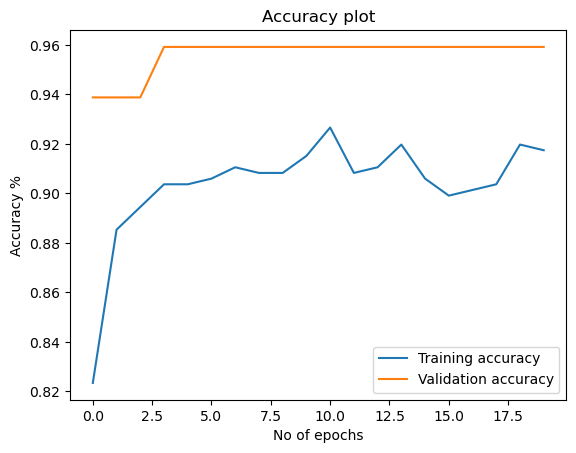

In [66]:
#Plot accuracy plot
plt.plot(history.history['acc'],label='Training accuracy')
plt.plot(history.history['val_acc'],label='Validation accuracy')
plt.legend()
plt.title('Accuracy plot')
plt.xlabel('No of epochs')
plt.ylabel('Accuracy %')
plt.show()

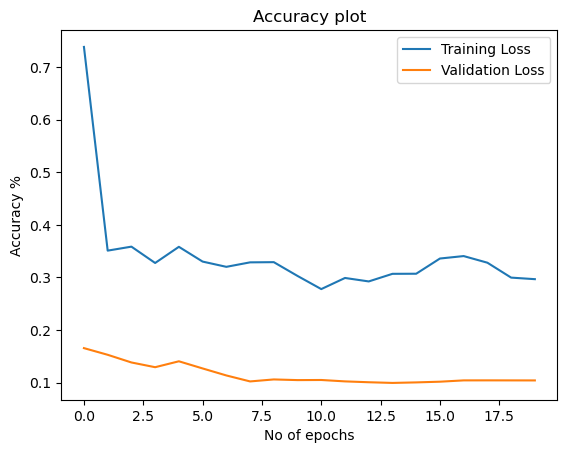

In [67]:
#Plot accuracy plot
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend()
plt.title('Accuracy plot')
plt.xlabel('No of epochs')
plt.ylabel('Accuracy %')
plt.show()

In [70]:
score = model.evaluate(x_train, y_train, verbose=1) 
print ("model train data score       : ",round(score[1]*100) , "%")

score = model.evaluate(x_test, y_test, verbose=1) 
print ("model test data score        : ",round(score[1]*100) , "%")

score = model.evaluate(x_val, y_val, verbose=1) 
print ("model validation data score  : ", round(score[1]*100), "%")

#score = model.evaluate(test_x, test_y, verbose=1) 
#print ("model unlabeled data score   : ", round(score[1]*100), "%")

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - acc: 0.9565 - loss: 0.1410 - mae: 0.0597 - mape: 29831424.0000 - mse: 0.0219
model train data score       :  95 %
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - acc: 0.9772 - loss: 0.1221 - mae: 0.0452 - mape: 22602204.0000 - mse: 0.0165
model test data score        :  98 %
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - acc: 0.9624 - loss: 0.0973 - mae: 0.0460 - mape: 22983894.0000 - mse: 0.0139
model validation data score  :  96 %
